In [1]:
import os
import cv2
import torch
import numpy as np
from models import networks

In [2]:
D_A = networks.define_D(3, 64, "basic", norm='instance')
D_B = networks.define_D(3, 64, "basic", norm='instance')
loss = networks.GANLoss("lsgan")

initialize network with normal
initialize network with normal


In [4]:
def load_saves(net, name, save_dir, device=torch.device('cpu')):
    
    def __patch_instance_norm_state_dict(state_dict, module, keys, i=0):
        """Fix InstanceNorm checkpoints incompatibility (prior to 0.4)"""
        key = keys[i]
        if i + 1 == len(keys):  # at the end, pointing to a parameter/buffer
            if module.__class__.__name__.startswith('InstanceNorm') and \
                    (key == 'running_mean' or key == 'running_var'):
                if getattr(module, key) is None:
                    state_dict.pop('.'.join(keys))
            if module.__class__.__name__.startswith('InstanceNorm') and \
               (key == 'num_batches_tracked'):
                state_dict.pop('.'.join(keys))
        else:
            __patch_instance_norm_state_dict(state_dict, getattr(module, key), keys, i + 1)
    
    load_filename = '%s.pth' % (name)
    load_path = os.path.join(save_dir, load_filename)

    state_dict = torch.load(load_path, map_location=str(device))
    if hasattr(state_dict, '_metadata'):
        del state_dict._metadata

    for key in list(state_dict.keys()):  # need to copy keys here because we mutate in loop
        __patch_instance_norm_state_dict(state_dict, net, key.split('.'))
    net.load_state_dict(state_dict)

In [4]:
load_saves(D_A, "res", "D_A", "pre_mod")
load_saves(D_B, "res", "D_B", "pre_mod")

In [1]:
import os
import cv2
import torch
import numpy as np
from models import networks

In [8]:
resnet_6 = networks.define_G(3, 3, 64, "resnet_nblocks", "instance",
                            True, "normal", 0.02, [], 6)
resnet_9 = networks.define_G(3, 3, 64, "resnet_nblocks", "instance",
                            False, "normal", 0.02, [], 9)

initialize network with normal
initialize network with normal


In [9]:
# load_saves(resnet_6, "res", "pre_mod")
load_saves(resnet_9, "horse2zebra", "checkpoints\cyclegan_9")

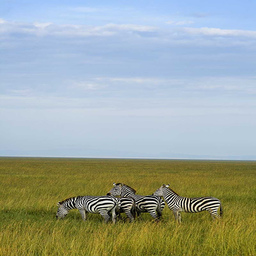

In [16]:
import glob
from PIL import Image
from matplotlib import pyplot as plt
# from IPython.display import Image
import torchvision.transforms as transforms

g = glob.glob(".\\datasets\\images for checking\\testB\\*.jpg")
transform_list = [transforms.Resize((256, 256), Image.BICUBIC), 
                  transforms.ToTensor(), 
                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
get_transform = transforms.Compose(transform_list)

for path in g[:1]:
    img = Image.open(path).convert('RGB')
    display(img)
    
    img = get_transform(img).unsqueeze(0)
    plt.imshow(resnet_9(img).detach().numpy()[0])
#     print(float(loss(D_A(img), True)))
    plt.show()
    

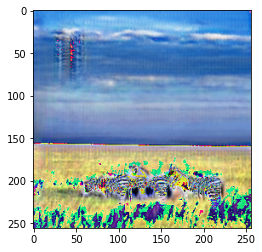

In [19]:
plt.imshow(np.uint8(np.transpose(new_img, (1, 2, 0)) * 255))

In [5]:
import glob
from PIL import Image
from matplotlib import pyplot as plt

g = glob.glob(".\\datasets\\k9\\*.jpg")

import torchvision.transforms as transforms

transform_list = [transforms.ToTensor()]
get_transform = transforms.Compose(transform_list)

imgs = []

for path in sorted(g, reverse=True):
    img = Image.open(path).convert('RGB')
    imgs.append(get_transform(img))

import torch 
from torchvision.utils import make_grid, save_image

imgs = torch.stack(imgs)

save_image(make_grid(imgs, nrow=6), ".\datasets\k9.jpg")

In [53]:
import torchvision.transforms as transforms

transform_list = [transforms.ToTensor()]
get_transform = transforms.Compose(transform_list)

imgs = []

for path in sorted(g, reverse=True):
    img = Image.open(path).convert('RGB')
    imgs.append(get_transform(img))

In [54]:
import torch 
from torchvision.utils import make_grid, save_image

imgs = torch.stack(imgs)


In [55]:
save_image(make_grid(imgs, nrow=2), ".\datasets\k9.jpg")